## learning-AI101 : topic1_3

perceptron model을 유기적으로 연결 -> 신경망 (neural network)
perceptron의 connected complexity(degree)에 따라 종류 나뉨
- SLP : Single layer perceptron (단일 신경망, 로젠블럿, mark-1 perceptron)
- MLP : Multi layer perceptron (다층 신경망, hidden layer가 많아짐)
- DNN : Deep Neural Network (딥러닝 네트워크, 은닉층 무지막지하게 많음 

hidden layer의 갯수가 많다 == 계산량이 많다 == 정교하다 == overfixxing이 발견될 수 있음

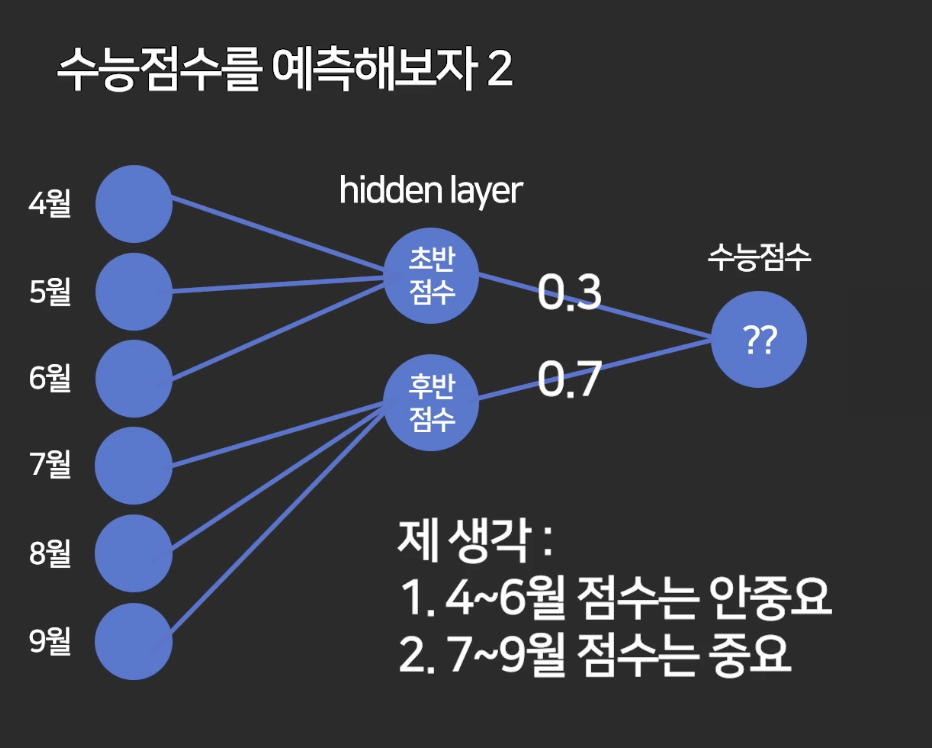

* 출처 : 코딩애플 인공지능 텐서플로우 강좌

**hidden layer는 쉽게 생각하면 일종의 기억 저장소**  
- 예시) 4월 ~ 9월 성적으로 수능점수 예측하기  
- 4 ~ 6월 성적과 7 ~ 9월 성적을 다른 기준으로 판단하려면 hidden layer의 다른 노드에 weighted sum을 저장하는 거임  
- 그러고 output layer로 도달할 때 key weight로 specific calculation하면 됨


In [9]:
# 위의 예시를 구현해보자

# weighted sum 구하는 사용자 지정 함수
def calculate_weighted_sum (list_compo, list_weight) : 
    weight_sum = 0
    
    for i in range(len(list_compo)) : 
        weight_sum += list_compo[i] * list_weight[i]

    return weight_sum

list_score = [] # 여기에 4, 5, 6, 7, 8, 9월 모의고사 성적 넣을거임
wt_front = 0.3 # 초반기 가중치 (4, 5, 6)
wt_last = 0.7 # 하반기 가중치 (7, 8, 9)
ws_front, ws_last = 0, 0 # 초반기, 하반기 weighted sum

for i in range (4, 10) : # input layer
    score = int(input(f'{i}월 모의고사 성적 입력 : '))
    list_score.append(score)

for i in range (6) : # hidden layer
    if i < 3 : 
        ws_front += list_score[i]

    else :
        ws_last += list_score[i]

else : # hidden layer에 정보 저장이 정상적으로 완료되면 평균 구하기
    ws_front = ws_front // 3
    ws_last = ws_last // 3

# output layer
print("수능 점수 예측 결과 : ", calculate_weighted_sum([ws_front, ws_last], [wt_front, wt_last]))
print("ws_front : ", ws_front)
print("ws_last : " , ws_last)
print("wt_front : ", wt_front)
print("wt_last : ", wt_last)


4월 모의고사 성적 입력 :  40
5월 모의고사 성적 입력 :  50
6월 모의고사 성적 입력 :  60
7월 모의고사 성적 입력 :  70
8월 모의고사 성적 입력 :  80
9월 모의고사 성적 입력 :  90


수능 점수 예측 결과 :  71.0
ws_front :  50
ws_last :  80
wt_front :  0.3
wt_last :  0.7


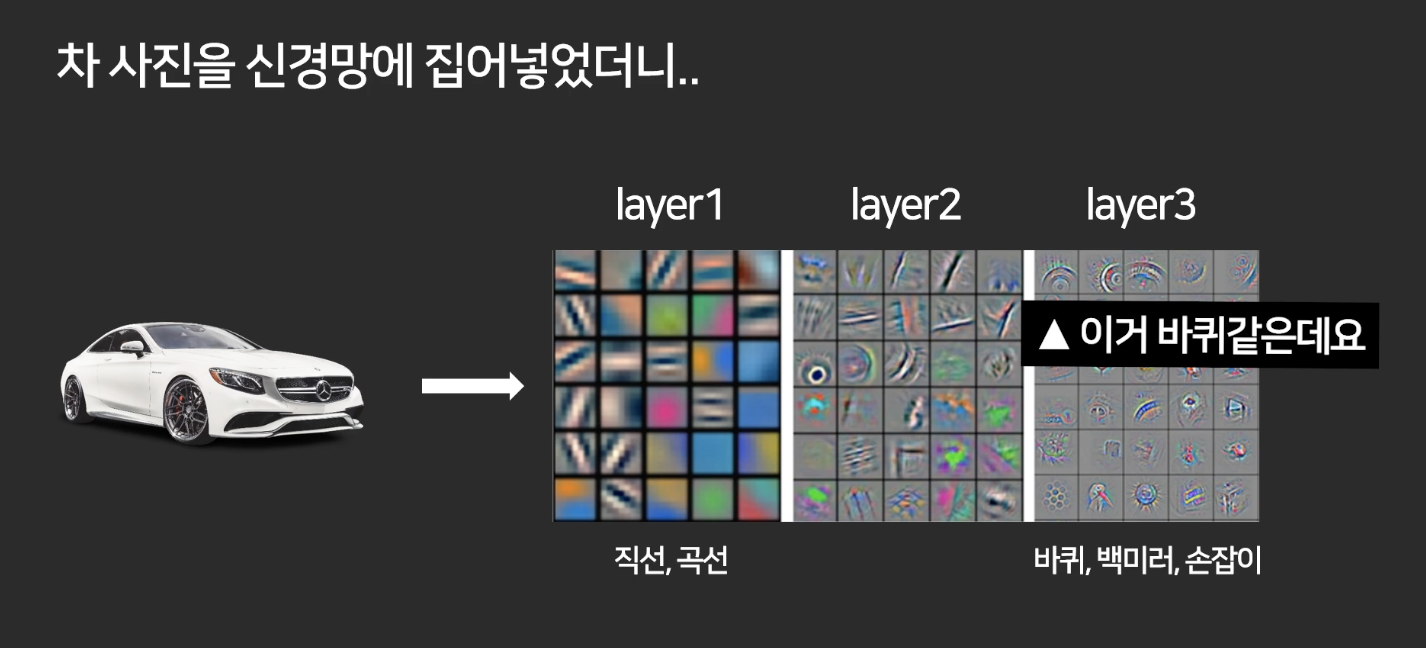

* 출처 : 코딩애플 인공지능 텐서플로우 강좌

**image detection, classification같은 경우**
- 사진을 특정 픽셀 단위로 cut
- np.reshape(k)와 같은 1차원 배열로 변환 (M*NX1)
- layer를 거치면서 스스로 판단하면서 직선, 곡선들끼리 모음 (hidden layer)
- 모아서 판단함 (곡선 모은거 이거 바퀴인가? 직선 모은거 이거 차 바디인가?...)
- **feature extraction** (머신러닝 : 기준 제시해야 함 / 딥러닝 : 자기가 알아서 특징 추출 (데이터의존성 큼))